# Most important factors that affect the house price and the prediction
<p style="color:DimGray; text-align:left; font-size:20px"><i> the case of the United Kingdom </i></p>
<a id="ID_title"></a>

_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self-contained Jupyter notebook with structure introduction, discussion, and embedded code and bibliography._

<p style="color:DimGray; text-align:left;"><i>This paper investigates the data gathered from GOV.uk, ONS (Office for National Statistics), Bank of England, London Datastore, Nationwide Building Society. It uses different multiple linear regression to determine the factors that make a significant impact on the UK house price. And it is reproducible for other cases with the data from other areas.</i></p>

***

<a id="ID_intr"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 1.0 | Introduction

In recent years, since the house price is linked to the development and investment in the real estate industry, its attention has been raised from the government and public worldwide. There are too many factors that influence the house price, making it difficult to provide a sufficient theoretical basis for the fluctuation of house prices and their influencing factors due to the imitation and paranoia of their respective views. This paper will investigate data from 1994 to 2020 in the UK house market and under its economic environment, with the analysis and compare with several multiple linear regression models to discover the most critical factors that affect the house price in the UK. Specifically, from all possible factors that may influence the UK house price, seven elements have been selected for the analysis, which is considered the best reflects the state of the British economy. And using appropriate data processing methods to avoid low significant parameters for the linear regressions. After that, four multiple linear regressions have been advanced by the previous methods with the best scores and used to analyse and generate the results of the research question. 

### 1.1 | Requirements to run the analysis

Overview of packages with brief explanations.

In [1]:
# Packages for data manipulation and processing
import math
import numpy as np
import pandas as pd

# Package for timing
import time
start_time = time.time()

# Package for visualisation
import matplotlib.pyplot as plt

# Packages for analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve

***
<a id="ID_lit"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 2.0 | Literature review

In the previous studies, scholars have found out the fundamentals of economic analysis as the measures for real estate price (Case and Shiller, 2004). The six measurements that Case has selected are the personal income, population, employment rate, unemployment rate, housing starts (the number of building work for new houses that has started within a particular time), average mortgage interest rates. The prediction has been generated out by applying regression analysis to the data. Similar factors are chosen by Poterba (1991); he used gross household income, interest rate, tax rate, the maintenance cost of buildings, population, and other financial parameters to model the house price dynamics. Also, in the short analysis by the Ministry of Housing, Communities and Local Government (MHCLG) (2018) illustrates the individual relationships between some significant determinants from the housing market and house prices. It has included household growth, real income growth, interest rate reduction, and housing supply as four main determinants to describe the fluctuation of the UK house price.

In this paper, seven factors will be used in the multiple linear regression to model the house price. Population and number of dwellings are used to reflect the demand for houses in the UK, and the dwelling stock can explain the housing supply. GDP and unemployment rates show the local economic fundamental. The mortgage interest rates and real income of households can illustrate the affordability of citizens in the UK. The data is scratched from several websites: GOV.uk, ONS (Office for National Statistics), Bank of England, London Datastore, Nationwide Building Societ with the same time series from 1994 to 2020. The time step is divided into quarters to maximize the volume of the dataset and avoid inaccuracy from the parametres which have only annual data. By improving the simple linear regression, multiple linear regressions are used in this data investigation to find the most critical factors that affect the house price in the UK. 

***
<a id="ID_Data"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 3.0 | Data Presentation

In this stage, the purpose is to load the data and check the elements in this data for validation. Then do the data cleaning and pre-process for further analysis in 5.0 Results. The data is collected from the UK government and several open-source statistic websites for analysing the UK house price. It contains the UK house prices from 1994 to 2020 quarterly in the order of relative time series. And it also includes the UK population, number of dwellings, GDP in millions, dwelling stock, mortgage interest rates, unemployment rates, and real income of households in the same order. The house price is chosen as the dependent variable, and the rest seven factors will be independent variables.

The data has been uploaded to the GitHub as a public resource, and use `panda.read_csv` to load the data by this link.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/TTonsss/DSSS/main/data.csv')

Using `.info()` to check the number of non-null values to make sure if there are missing values and the data type for each column in the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               108 non-null    object 
 1   House_price        108 non-null    int64  
 2   Population         108 non-null    int64  
 3   dwelling           108 non-null    int64  
 4   GDP(m)             108 non-null    int64  
 5   dwelling stock     108 non-null    int64  
 6   mortgage_rate      108 non-null    float64
 7   unemployment_rate  108 non-null    float64
 8   Real_income        108 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.7+ KB


`.head()` shows the title and the detailed data in first 5 rows.

In [4]:
data.head()

,Year,House_price,Population,dwelling,GDP(m),dwelling stock,mortgage_rate,unemployment_rate,Real_income
0,Q1 1994,51327,57862100,20139,317468,3666190,5.13,9.9,208676
1,Q2 1994,51362,57862100,20139,321166,3666190,5.33,9.7,208365
2,Q3 1994,51731,57862100,20139,324811,3666190,5.63,9.4,212502
3,Q4 1994,52114,57862100,20139,326734,3666190,6.13,9.0,211454
4,Q1 1995,51084,58024800,20305,328056,3564590,6.63,8.9,215037


Some titles include spaces, and brackets. Use `.rename()` to change the column name.

In [5]:
data = data.rename(columns={'House_price': 'price','Population': 'population', 'GDP(m)': 'GDP', 'dwelling stock': 'dwelling_stock'})
data.head()

,Year,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
0,Q1 1994,51327,57862100,20139,317468,3666190,5.13,9.9,208676
1,Q2 1994,51362,57862100,20139,321166,3666190,5.33,9.7,208365
2,Q3 1994,51731,57862100,20139,324811,3666190,5.63,9.4,212502
3,Q4 1994,52114,57862100,20139,326734,3666190,6.13,9.0,211454
4,Q1 1995,51084,58024800,20305,328056,3564590,6.63,8.9,215037


`.isnull().sum()` is used for checking the number of empty blocks in each column and use `.count()` to get the total number of values. By dividing the total number in the corresponding columns with missing values, it gives the percentages of missing value. `.sort_values(ascending=False)` will put the result in descending order which is easy to see the worst column that contains most missing data.

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Year,0,0.0
price,0,0.0
population,0,0.0
dwelling,0,0.0
GDP,0,0.0
dwelling_stock,0,0.0
mortgage_rate,0,0.0
unemployment_rate,0,0.0
Real_income,0,0.0


The `.max()` helps to find the maximum number of missing data which makes the column be considered to drop during the data cleaning.

In [7]:
data.isnull().sum().max()

0

In this case, there is no missing data, and the data is ready to move into the next stage. 
Now it is time to look into the data and see how the values distribute in each columns. Use `.describe()` to get the statistic values such as mean, standard deviation and the range of it.

In [8]:
data.describe()

,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
count,108.000000,1.080000e+02,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000
mean,142290.990741,6.183294e+07,21955.703704,444730.074074,2.296837e+06,5.490185,6.099074,295790.935185
std,56804.657450,3.093832e+06,1717.373017,63940.667671,7.241507e+05,1.273513,1.547533,47827.254735
min,50930.000000,5.786210e+07,15950.000000,317468.000000,1.583068e+06,3.620000,3.800000,208365.000000
25%,81521.500000,5.888610e+07,20927.000000,396169.500000,1.668683e+06,4.290000,4.975000,261115.250000
50%,162247.500000,6.131910e+07,22073.000000,459800.500000,1.987343e+06,5.545000,5.500000,306959.500000
75%,184734.250000,6.459680e+07,23236.000000,491801.500000,3.011995e+06,6.622500,7.800000,329007.750000
max,229819.000000,6.788601e+07,24414.000000,544733.000000,3.666190e+06,7.740000,9.900000,370990.000000


For more clear data visualisation, `.hist()` shows the data distribution for each determinants.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'dwelling'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'dwelling_stock'}>,
        <AxesSubplot:title={'center':'mortgage_rate'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:title={'center':'Real_income'}>, <AxesSubplot:>]],
      dtype=object)

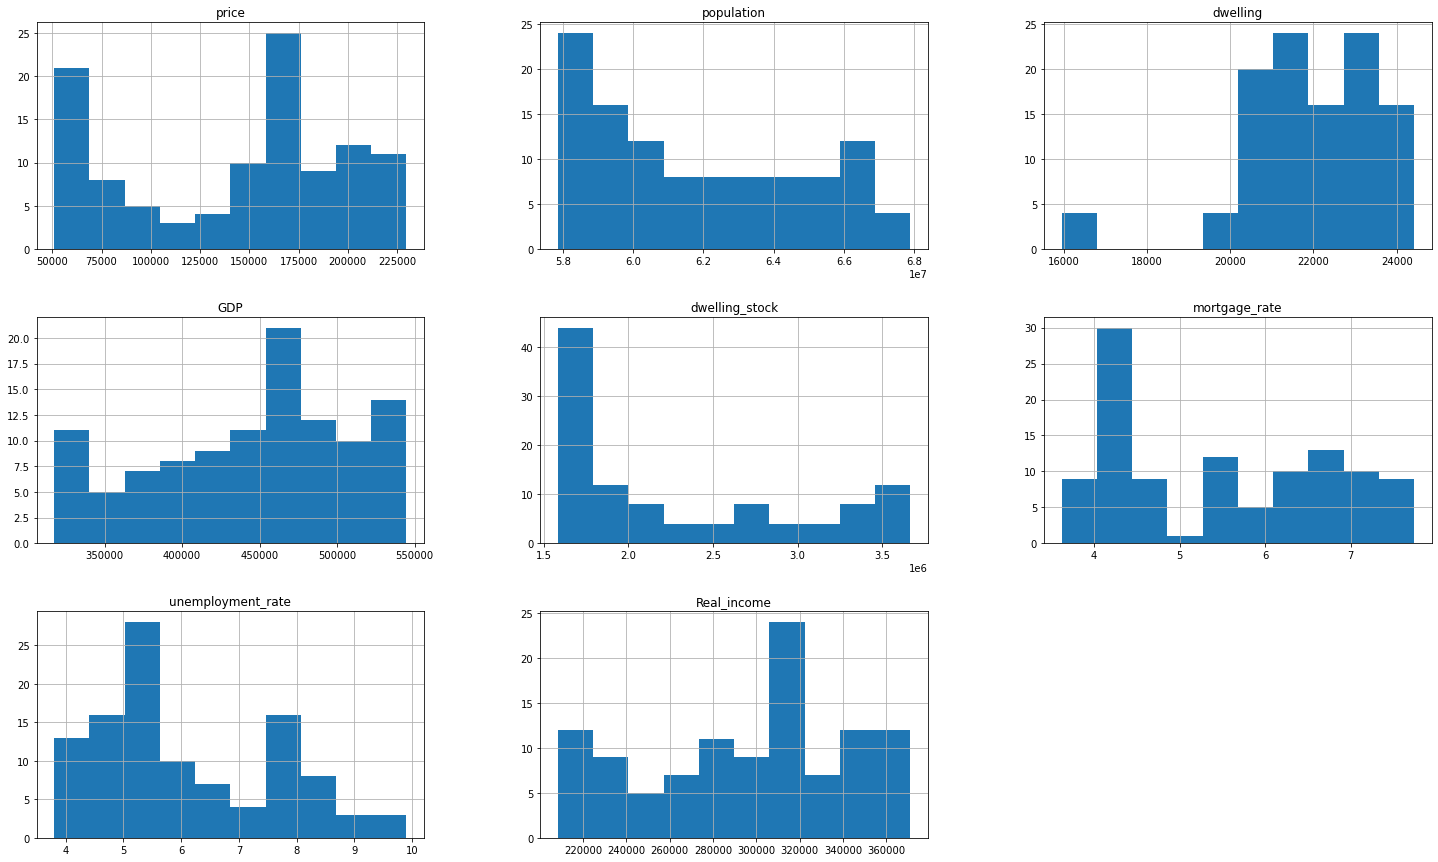

In [9]:
data.hist(figsize=(25,15))

Using the `.boxplot()` from `matplotlib.pyplot()` package to visualise the range and quartiles of the numerical data.

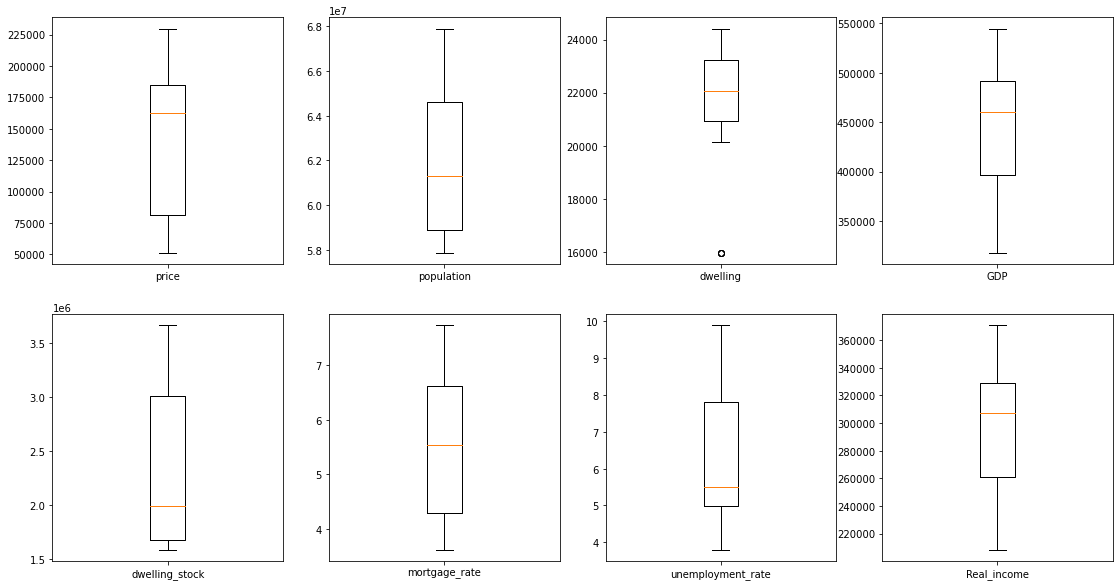

In [10]:
plt.figure(figsize=(19, 10))
plt.subplot(241)
plt.boxplot(data['price'], labels = ['price'])
plt.subplot(242)
plt.boxplot(data['population'], labels = ['population'])
plt.subplot(243)
plt.boxplot(data['dwelling'], labels = ['dwelling'])
plt.subplot(244)
plt.boxplot(data['GDP'], labels = ['GDP'])
plt.subplot(245)
plt.boxplot(data['dwelling_stock'], labels = ['dwelling_stock'])
plt.subplot(246)
plt.boxplot(data['mortgage_rate'], labels = ['mortgage_rate'])
plt.subplot(247)
plt.boxplot(data['unemployment_rate'], labels = ['unemployment_rate'])
plt.subplot(248)
plt.boxplot(data['Real_income'], labels = ['Real_income'])
plt.show()

Take a further step on visualisation, putting the determinants into the time series by `.plot()` from the same package above. And now the trends of all factors are obvious through the observation period.

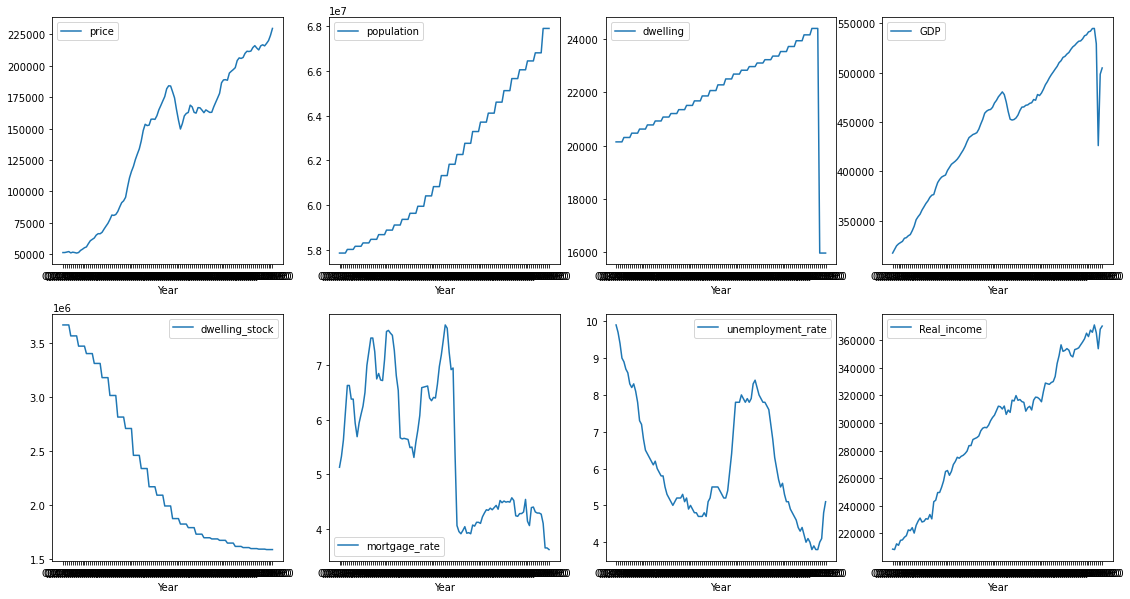

In [11]:
x=data['Year']
y0=data['price']
y1=data['population']
y2=data['dwelling']
y3=data['GDP']
y4=data['dwelling_stock']
y5=data['mortgage_rate']
y6=data['unemployment_rate']
y7=data['Real_income']


plt.figure(figsize=(19, 10))
plt.subplot(241)
plt.plot(x, y0,label='price')
plt.legend()
plt.xlabel('Year')
plt.subplot(242)
plt.plot(x, y1,label='population')
plt.legend()
plt.xlabel('Year')
plt.subplot(243)
plt.plot(x, y2,label='dwelling')
plt.legend()
plt.xlabel('Year')
plt.subplot(244)
plt.plot(x, y3,label='GDP')
plt.legend()
plt.xlabel('Year')
plt.subplot(245)
plt.plot(x, y4,label='dwelling_stock')
plt.legend()
plt.xlabel('Year')
plt.subplot(246)
plt.plot(x, y5,label='mortgage_rate')
plt.legend()
plt.xlabel('Year')
plt.subplot(247)
plt.plot(x, y6,label='unemployment_rate')
plt.legend()
plt.xlabel('Year')
plt.subplot(248)
plt.plot(x, y7,label='Real_income')
plt.legend()
plt.xlabel('Year')
plt.show()



***
<a id="ID_Method"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 4.0 | Methodology

Since we want to find which factors have a more significant impact on the house price and seven independent determinants, therefore multiple linear regression is a good choice for the analysis.

When doing regression, the first thing that needs to be considered is multicollinearity. The meaning of multicollinearity is the problem between two or more variables when their correlations are getting too high to affect the regression result and make it not reliable because the high correlation between variables explains that data contains similar information of variance within the dataset. This may be caused by the data collection method, insufficient data, incorrect dummy variables, including the combination of other variables or two identical variables (Stephanie, 2015). There are two ways to avoid multicollinearity, one is Variance Inflation Factor (VIF), and the other one is LASSO. Both of these two methods will filter the independent variables for the later multiple linear regression.

Firstly, a correlation matrix is helpful to visualise the correlation and check the multicollinearity between variables.

### Correlation
Drop the `Year` column first, use `.drop()`, since it is not the variable we select in this case. And then plot the correlation matrix by the rest data.

Text(0.5, 1.0, 'Correlation Matrix')

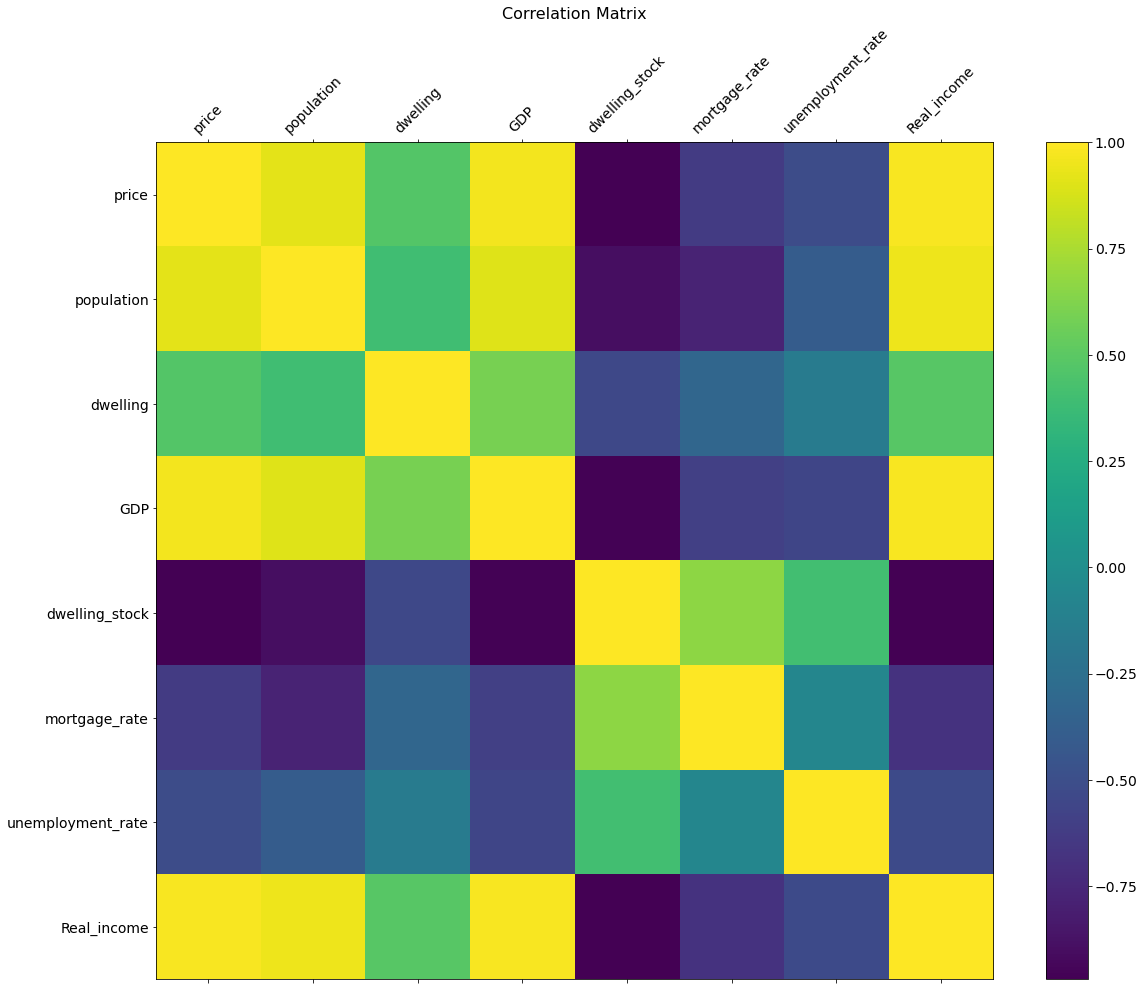

In [12]:
data = data.drop(['Year'],axis = 1)
df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Stepwise regression
Before filter the data with VIF or Lasso, it is also important to check the p-value for each factor. The stepwise regression is to do the stepwise selection first to select the factors with sufficient small p-value then do the regression with the selected variables. Here is the function of the `stepwise_selection`.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

Now separate the data into predictors data (independent variables) and response data (dependent variable). Then do the stepwise selection.

In [14]:
predictors_data = data.drop(columns=['price'], axis=1)
response_data = data['price']
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data,initial_list=[], 
                           threshold_in=0.03, 
                           threshold_out = 0.05, 
                           verbose=True)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  Real_income                    with p-value 7.91535e-78
Add  dwelling_stock                 with p-value 5.53285e-06
Add  mortgage_rate                  with p-value 0.000182488
Add  dwelling                       with p-value 0.012535
The predictors that are selected by stepwise regression are:
['Real_income', 'dwelling_stock', 'mortgage_rate', 'dwelling']


<ipython-input-13-e410ad27e6f3>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-13-e410ad27e6f3>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-13-e410ad27e6f3>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-13-e410ad27e6f3>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-13-e410ad27e6f3>:26: 

From the result above, `Real_income`, `dwelling_stock`,`mortgage_rate`, `dwelling` has sufficient small p-value which is significant enough to apply in the multiple linear regression. Use `statsmodels.api.OLS()` to do the regression with 4 selected variables and print out the result through `.summary()`.

In [15]:
multi_regression_model_1 = smf.ols(formula='price ~ Real_income+dwelling_stock+mortgage_rate+dwelling',data=data).fit()
multi_regression_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.14e-81
Time:                        16:00:31   Log-Likelihood:                -1135.5
No. Observations:                 108   AIC:                             2281.
Df Residuals:                     103   BIC:                             2294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.895e+04   3.86e+04     -0.491      0.625   -9.55e+04    5.76e+04
Real_income        0.8235      0.073     11.209      0.000       0.678       0.969
dwelling_stock    -0.0301      0.005     -6.019      0.000      -0.040      -0.020
mortgage_rate   3872.8773    946.139      4.093      0.000    1996.434    5749.321
dwelling          -1.5758      0.620     -2.541      0.013      -2.806      -0.346
==============================================================================
Omnibus:                        2.673   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.389
Skew:                          -0.364   Prob(JB):                        0.303
Kurtosis:                       3.018   Cond. No.                     1.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF
The Variance Inflation Factor (VIF) is a measure of multicollinearity in the multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. This is a necessary step to drop the VIF which contains high degree of correlation with the rest columns in the dataset. Higher the value of VIF reflects more serious multicollinearity between the independent variables; and the correlation problem between determinants will be less serious if the value of VIF is less than 10. Therefore, set the `threshhold` as 10 and run the `calculate_vif_` function below.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

Input all the independent variables in to the VIF function.

In [17]:
df_predictors_select_VIF = calculate_vif_(predictors_data)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)


Features above VIF threshold:

                       VIF
Real_income     115.860356
GDP              66.703567
dwelling_stock   38.329556
population       26.146229
Dropping: Real_income
Dropping: GDP
Dropping: dwelling_stock
Dropping: population
The columns remaining after VIF selection are:
Index(['dwelling', 'mortgage_rate', 'unemployment_rate'], dtype='object')


After the VIF calculation, 3 variables are selected. Now do the multiple linear regression with selected variables and again use `.summary()` to print out the result.

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     97.16
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.84e-30
Time:                        16:00:31   Log-Likelihood:                -1262.9
No. Observations:                 108   AIC:                             2534.
Df Residuals:                     104   BIC:                             2545.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.561e+05   4.87e+04      5.256      0.000    1.59e+05    3.53e+05
dwelling              6.7836      1.782      3.807      0.000       3.250      10.317
mortgage_rate     -2.651e+04   2382.262    -11.126      0.000   -3.12e+04   -2.18e+04
unemployment_rate -1.922e+04   1879.437    -10.228      0.000   -2.29e+04   -1.55e+04
==============================================================================
Omnibus:                       10.578   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.720
Skew:                           0.737   Prob(JB):                      0.00470
Kurtosis:                       3.459   Cond. No.                     3.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso
Least absolute shrinkage and selection operator (Lasso) is a regression method that performs both variable selection and regularisation (or penalty). By using Lasso to filter data, the linear regression model will gain a higher accuracy on prediction and interpretability. In Lasso, the lambda (or alpha) parameter controls the strength of regularisation. Run the Lasso function by using `.Lasso()` in the `sklearn` packages (alpha=1 as default).

In [19]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(max_iter=10e8, tol=0.01, normalize=True)
lasso_model.fit(X=predictors_data, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

Here is the score of the lasso model after the regression.

In [20]:
lasso_model.score(X=predictors_data, y=response_data)

0.9758363789651879

And print out the coefficients of the variables.

In [21]:
df_coef_lasso = pd.DataFrame({"var": predictors_data.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                 var         coef
0         population     0.002060
1           dwelling    -2.445227
2                GDP     0.174455
3     dwelling_stock    -0.037045
4      mortgage_rate  3214.659079
5  unemployment_rate  -729.029853
6        Real_income     0.357165


Apply the Lasso regression with a range of lambda parameters, and see how the coefficients change with the lambda value. The plot is called `LASSO Path`.

C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615473214.2092285, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2341295681.5967674, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727371422.7055373, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\l

(-1.3, 5.3, -29677.255216496535, 23350.672933692364)

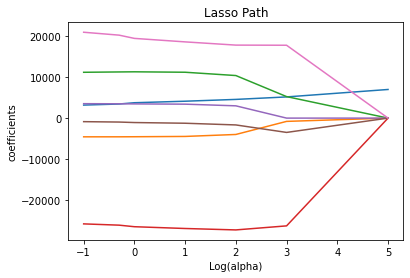

In [22]:
from itertools import cycle
from sklearn.linear_model import lasso_path
predictors_data_standardised = predictors_data/predictors_data.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

The result seems not good since the warning is telling that `Objective did not converge`. As noticed there are values keep increasing even enlarge the number of iterations. Therefore, removing independent variables is needed. In this case we drop `Real_income` and `GDP`.

In [23]:
predictors_data_new = predictors_data.drop(['Real_income','GDP'], axis=1)
lasso_model.fit(X=predictors_data_new, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

Run Lasso model again and get the new score.

In [24]:
lasso_model.score(X=predictors_data_new, y=response_data)

0.9728263117922002

Print the new coefficient values and plot the `Lasso Path` again.

                 var         coef
0         population     0.005945
1           dwelling    -1.081849
2     dwelling_stock    -0.056522
3      mortgage_rate  4012.459828
4  unemployment_rate -3454.756737


(-1.45, 8.45, -45356.12256812138, 18588.460376394825)

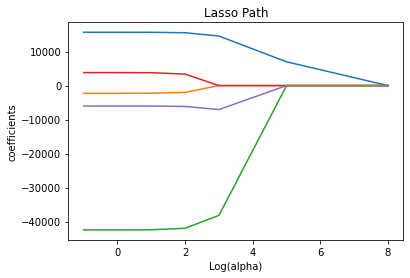

In [25]:
df_coef_lasso = pd.DataFrame({"var": predictors_data_new.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)
predictors_data_standardised = predictors_data_new/predictors_data_new.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000, 100000000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

This time the Lasso Path is converged and seems much better than the previous one.

### Random forest
With the advanced regression, Machine learning is needed in this stage. And Random Forest is a Supervised learning algorithm based on the ensemble learning method and many Decision Trees. Since this regression is not time series problem, it is a good fit for using Random forest.

Now start with separating the data into independent`X` and dependent `y` variables, and check the shape of them.

In [26]:
X = data.drop(['price'], axis=1)
y = data['price']
print(X.shape)
print(y.shape)

(108, 7)
(108,)


Use `train_test_split()` from `sklearn.model_selection` package to split the data into train, validation and test sets. Check the size of them.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(75, 7)
(16, 7)
(17, 7)


Import `RandomForestRegressor()` to do the Random Forest regression with the training set.

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

Check the out come score with the training set.

In [29]:
rf.score(X_train, y_train)

0.9990770959743112

Check the out come score with the validation set.

In [30]:
rf.score(X_val, y_val)

0.943133792600084

### Optimise hyperparameters of the ML model
On the development dataset there are still some hyperparameters can be tuned to optimise the performance of the model. There are two ways of using development dataset: Using predefined trainig and development set, and Cross validation.

We will try both methods below to compare which one suits better for this dataset.

#### Using predefined training and development set
First, try the predefined training and development set. Set up number of trees to tune and process of tune the number of trees. Then print the max score with the corresponding number of trees.

In [31]:
no_trees = [10,20,30,40,50,70,100,150,200]

max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t
print("max_score: " + str(max_score))
print("best_no_trees: " + str(best_no_trees))

max_score: 0.9472032965585095
best_no_trees: 70


Redo the Random Forest regression with `n_estimators` set to be 70.

In [32]:
rf_final_70t = RandomForestRegressor(n_estimators=best_no_trees)
rf_final_70t.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70)

Check the score again under 70 trees condition.

In [33]:
print('The score on the training set:')
print(rf_final_70t.score(X_train, y_train))
print('The score on the validation set:')
print(rf_final_70t.score(X_val, y_val))

The score on the training set:
0.9992742600309761
The score on the validation set:
0.9495703531480526


#### Cross-validation
Use `model_selection.GridSearchCV()` from `sklearn` packages to run the regression with a list of number of trees. Finally check the best parameter value and the best score under this value.

In [34]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train)
cvtree = clf.best_params_
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.9910230940903839


Plot the Validation curve of the training and validation scores to find out whether the model is overfitting or underfitting.

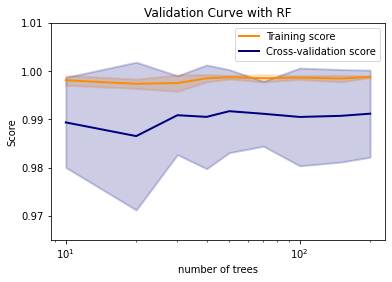

In [35]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.965, 1.01)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Run the regression under the optimising choice by cross validation.

In [36]:
rf_final_10t = RandomForestRegressor(n_estimators=100)
rf_final_10t.fit(X_train, y_train)

RandomForestRegressor()

Compare the result of 2 methods.

In [37]:
print(rf_final_70t.score(X_test, y_test))
print(rf_final_10t.score(X_test, y_test))

0.9887816320722881
0.9899800843617006


In [38]:
rf_final_10t.predict(X_test)

array([173747.41, 150861.72,  64754.42, 213751.59, 111185.26, 207275.25,
       208776.1 , 153313.7 , 208420.23, 215733.56, 195554.59, 127559.17,
       215876.6 , 198978.8 , 164802.11, 173776.18, 205228.51])

***
<a id="ID_Results"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 5.0 | Results
Compare the stepwise regression with the VIF and Lasso regression methods, the VIF has the least degree of fit which is only 3. However the Lasso regression keep 5 of the factors. All of these three methods drop the `GDP`, "VIF" and "Lasso" both drop `Real_income`. This result illustrates GDP and Real income have the most serious multicolinearity in this dataset. Besides, `GDP`, `unemployment_rate`, and `population` are not significant enough to pass the stepwise selection. 

After comparing the coefficients of the first three methods, it is obvious to observe that the mortgage rates has the greatest absolute value among all the factors. This result means it is the factor that makes greatest impact on the house prices. However the mortgage rates and unemployment rates are in percentage which fluctuate less than the other elements in the real life. By considering this, ignore these two rates, the number of dwellings becomes the most important factor of the house prices in the UK.

Finally, after optimising the number of trees in the Random forest regression, compare the final scores of these two optmising methods. We chose the higher one, cross validation, to do the prediction of house price by the test set of independent variables. Run the code below to get the prediction result.

In [39]:
print(X_test)
rf_final_10t.predict(X_test)

     population  dwelling     GDP  dwelling_stock  mortgage_rate  \
56     61823800     22511  480523         1870366           7.24   
42     59950400     21684  438191         2334631           6.59   
17     58474900     20778  367660         3309244           7.50   
97     66435600     24172  534140         1592141           4.06   
35     59365700     21354  418465         2706036           5.64   
92     66040200     23950  526081         1601550           4.28   
95     66040200     23950  531737         1601550           4.54   
62     62260500     22694  452595         1819696           3.91   
90     65648100     23733  520379         1612325           4.24   
102    66796800     24414  544639         1587164           4.29   
86     65110000     23543  512070         1643256           4.50   
38     59636700     21513  430274         2456917           5.31   
101    66796800     24414  541944         1587164           4.29   
87     65110000     23543  515430         164325

array([173747.41, 150861.72,  64754.42, 213751.59, 111185.26, 207275.25,
       208776.1 , 153313.7 , 208420.23, 215733.56, 195554.59, 127559.17,
       215876.6 , 198978.8 , 164802.11, 173776.18, 205228.51])

***
<a id="ID_Discussion"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 6.0 | Discussion
As the maximum columns of dropping by "VIF" method is 4, which are too many for the dataset. This means the correlations between variables that have been selected are too high which makes the final regression result are all close to 1 and maybe less reliable. And by looking at the Validation Curve, it can tell the variance of cross validation score is high, even the training scores do not fluctuate very much. This is caused by the volume of the dataset is too small, which also shrink the validation set. The Validation curve will perform better with greater dataset. What is more, a dataset contains non-linear variables would fit better in the Random Forest regression, and we should be careful when using this algorithm.

***
<a id="ID_Conclusion"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 7.0 | Conclusion
Through the several analysis above, they give out many regression models to predict house price in the UK. The determinants with positive coefficients make house price increase when they increase, and those with negative coefficients affect the house price in the opposite way. Among all the factors, mortgage rates makes the greatest impact on the model since it has the largest absolute coefficient, and the number of dwellings is the most important value that affect the real estate price. Therefore these two factors should get more attention from government and public. And they should also be considered as the most impactful variables when building a house price prediction model.

In [40]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Total run time:  34.673450231552124 seconds


#### Word count: 2393 words

***
<a id="ID_Biblio"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## Bibliography
### Reference
Case, K.E. and Shiller, R.J., 2003. Is there a bubble in the housing market?. Brookings papers on economic activity, 2003(2), pp.299-342.

Poterba, J.M., Weil, D.N. and Shiller, R., 1991. House price dynamics: the role of tax policy and demography. Brookings Papers on Economic Activity, 1991(2), pp.143-203.

Ministry of Housing, Communities and Local Government (MHCLG), 2018. Analysis of the determinants of house price changes.

Stephanie, (2015). Multicollinearity: Definition, Causes, Examples, online available at: [here](https://www.statisticshowto.com/multicollinearity/), retrieved on May 3, 2020

### Data resource
[nationwide-house price](https://www.nationwide.co.uk/about/house-price-index/download-data)
[Gov.uk-dwelling stock](https://www.gov.uk/government/statistical-data-sets/live-tables-on-dwelling-stock-including-vacants)
[Gov.uk-dwelling](https://www.gov.uk/government/statistical-data-sets/live-tables-on-house-building)
[London Data store-population](https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough)
[Bank of England-mortgage rates](https://www.bankofengland.co.uk/monetary-policy/the-interest-rate-bank-rate)
[ONS-GDP/unemployment rate/Real income](https://www.ons.gov.uk/)

***
<a id="ID_Appendix"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## Appendix

***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self-contained Jupyter notebook with structure introduction, discussion, and embedded code and bibliography._
<br>
**Code is hosted [here](https://github.com/TTonsss/DSSS/blob/main/assessment.ipynb)**<br>
**Data is available [here](https://github.com/TTonsss/DSSS/blob/main/data.csv)**
***